   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 22.4 MB/s eta 0:00:00
PROJECT 4: FULL PIPELINE | Span Extraction (RoBERTa QA) + INLINE FIGS + CM + LOOP DEMO
Transformers: 4.57.3 | Torch: 2.9.0+cu126
Time: 2025-12-16 05:26:12
Device: cuda
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
TRAIN_CSV: /content/train.csv
TEST_CSV : /content/test.csv
Train size: 27480 | Test size: 3534
sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

EDA + VISUALIZATION
Saved figure: /content/figs/eda_sentiment_distribution.png
Saved figure: /content/figs/eda_text_len_hist.png
Saved figure: /content/figs/eda_selected_len_hist.png
Saved figure: /content/figs/eda_sel_ratio_boxplot.png

Span stats by sentiment:
negative | n= 77

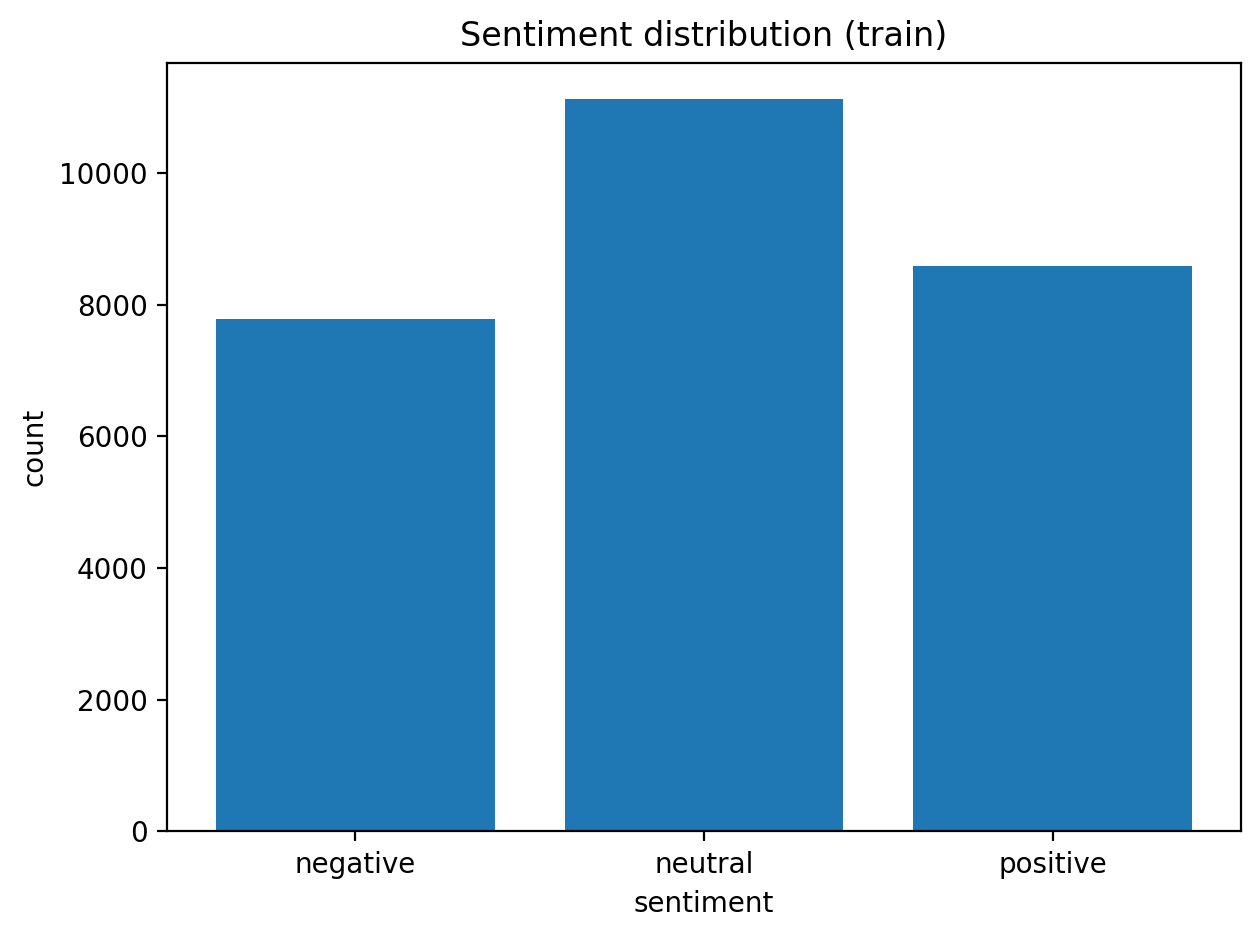


INLINE FIGURE: EDA Selected Ratio by Sentiment


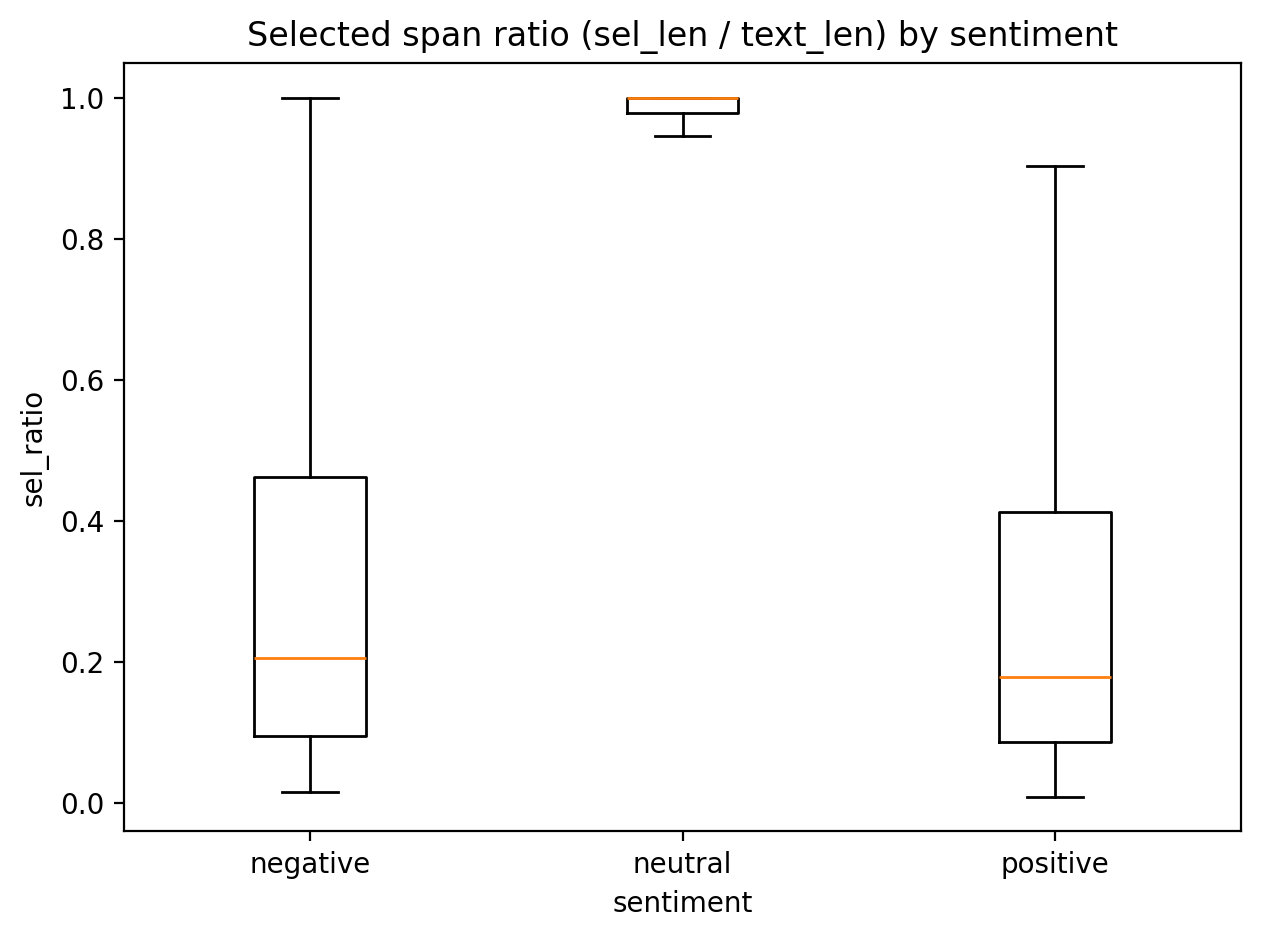


Train split: 24732 | Val split: 2748

CONFIG
Model: cardiffnlp/twitter-roberta-base | MAX_LEN=192
Train: LR=2e-05, epochs=4, bs=16, grad_acc=2, wd=0.01, warmup=0.06
Decode: topk=50, temp=0.9, len_pen=0.01, single_pen=0.25, mid_bonus=0.08 (2-10)
Neutral rule (submission): True | LLRD: True (decay=0.9)


config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]


Encoding train/val...


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of RobertaForQuestionAnswering were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.



TRAINING...


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss
1,0.963200,0.895595
2,0.856100,0.842494
3,0.753900,0.819105
4,0.733500,0.817424


Saved model to: /content/ati_p4_seed55_final
Saved figure: /content/figs/train_curve_loss.png

INLINE FIGURE: Training Loss Curve


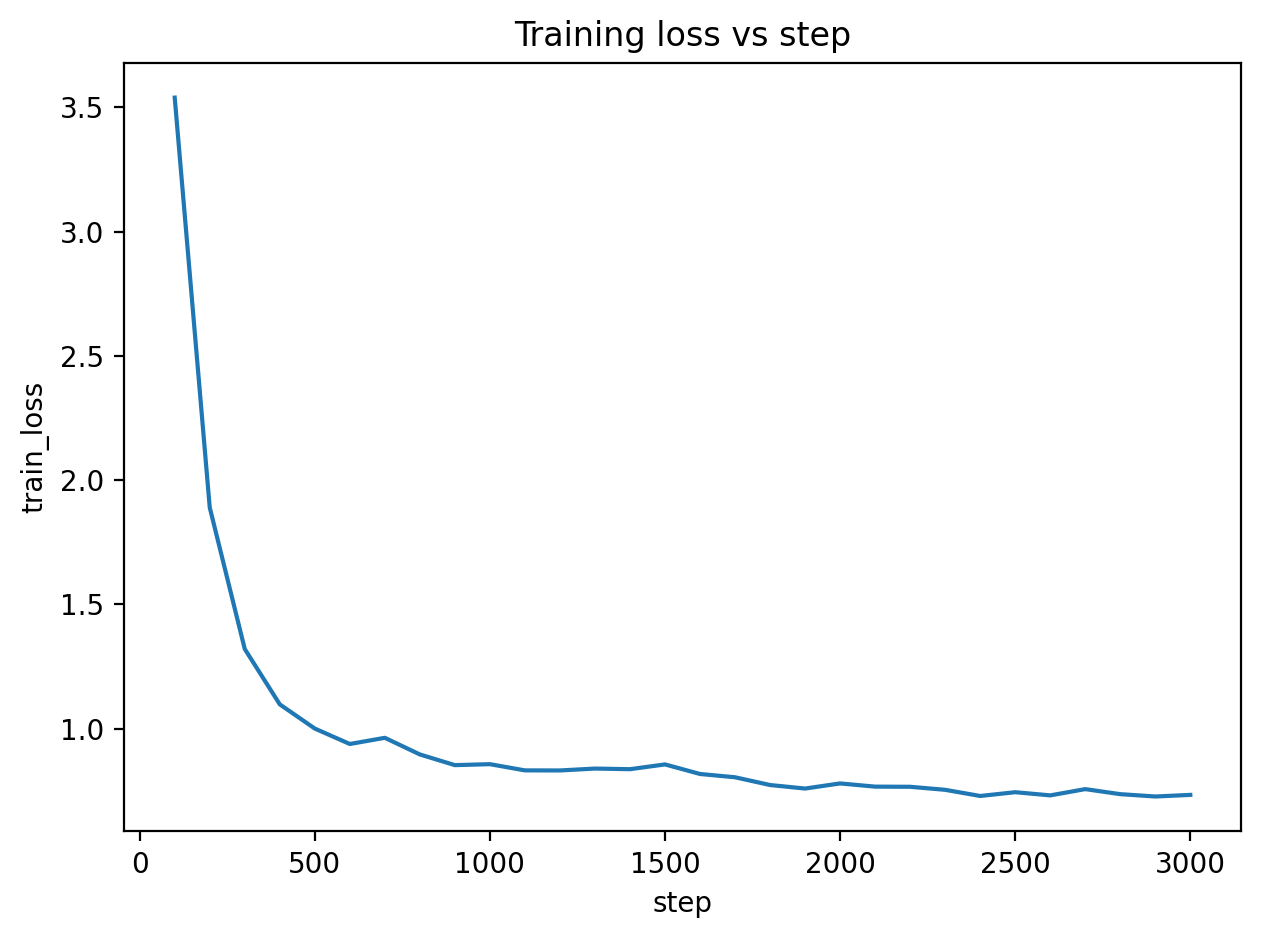

Saved figure: /content/figs/val_curve_eval_loss.png

INLINE FIGURE: Validation Loss Curve


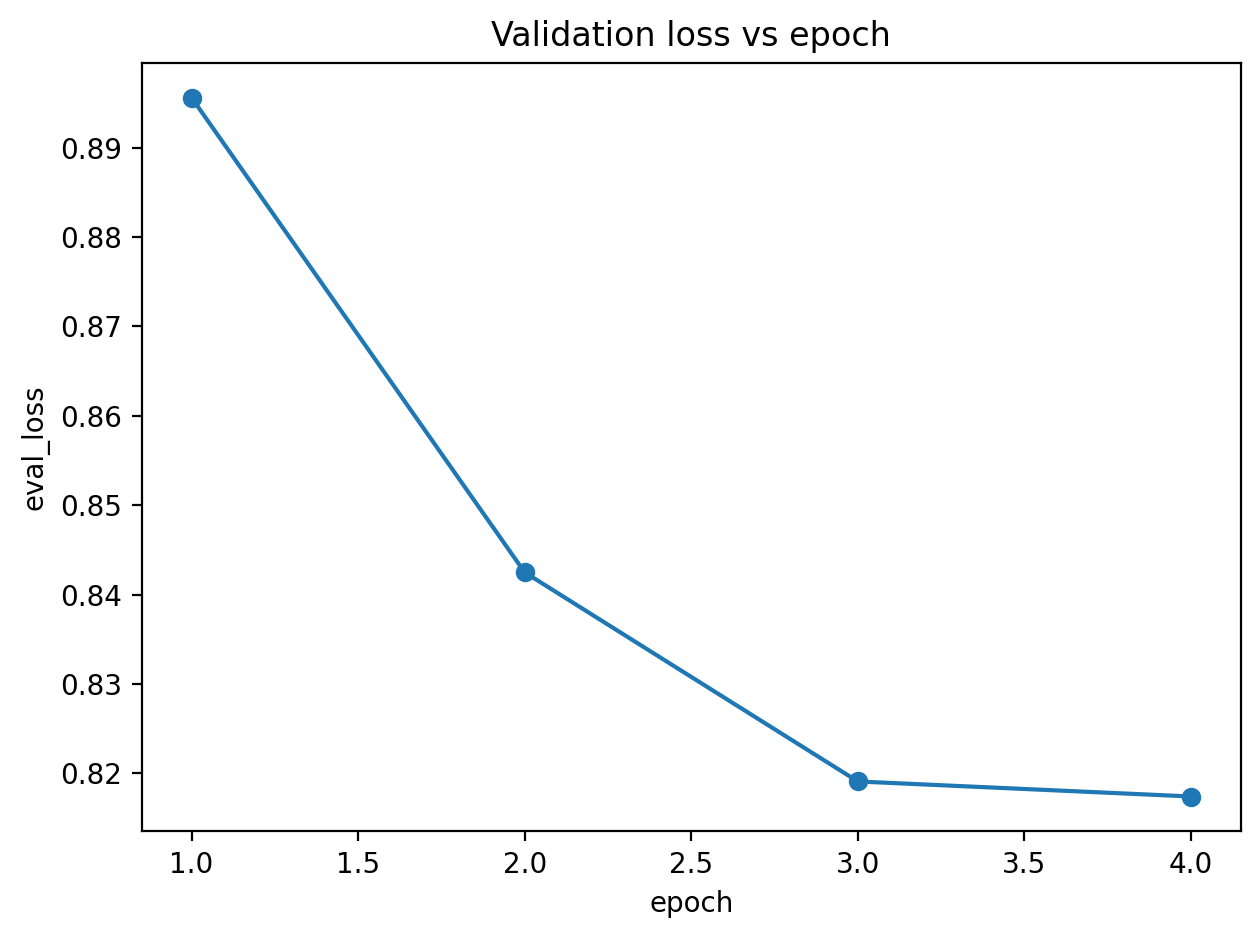


EVALUATION ON VAL (report BOTH: neutral_rule OFF and ON)

------------------------------------------------------------------------------------------
EVAL (Neutral rule OFF) - more 'honest' for model capability
------------------------------------------------------------------------------------------
VAL RESULTS (MACRO)
Word Jaccard:   0.7248
Char Precision: 0.8545
Char Recall:    0.8367
Char F1:        0.7885
Char IoU:       0.7386

VAL RESULTS (MICRO over chars)
Micro-Prec: 0.8861 | Micro-Rec: 0.8449 | Micro-F1: 0.8650 | Micro-IoU: 0.7621 | Char-Acc: 0.8573

PER-SENTIMENT (MACRO)
positive | Jaccard=0.5500 | CharF1=0.6494 | n=858
negative | Jaccard=0.5580 | CharF1=0.6673 | n=778
neutral  | Jaccard=0.9763 | CharF1=0.9805 | n=1112

------------------------------------------------------------------------------------------
EVAL (Neutral rule ON)  - matches your submission policy
------------------------------------------------------------------------------------------
VAL RESULTS (MACRO)


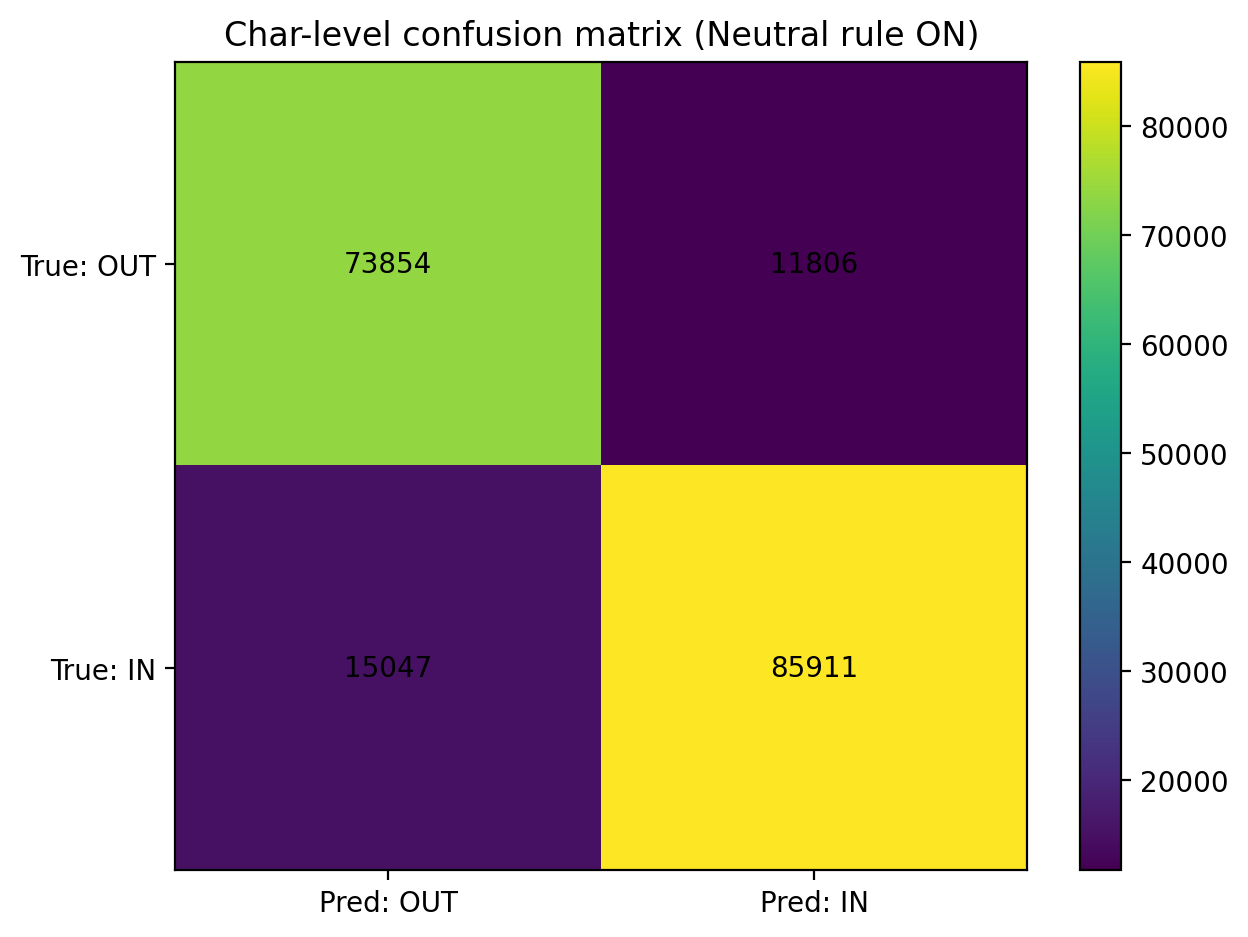


INLINE FIGURE: Confusion Matrix (Char-level) - Neutral rule OFF


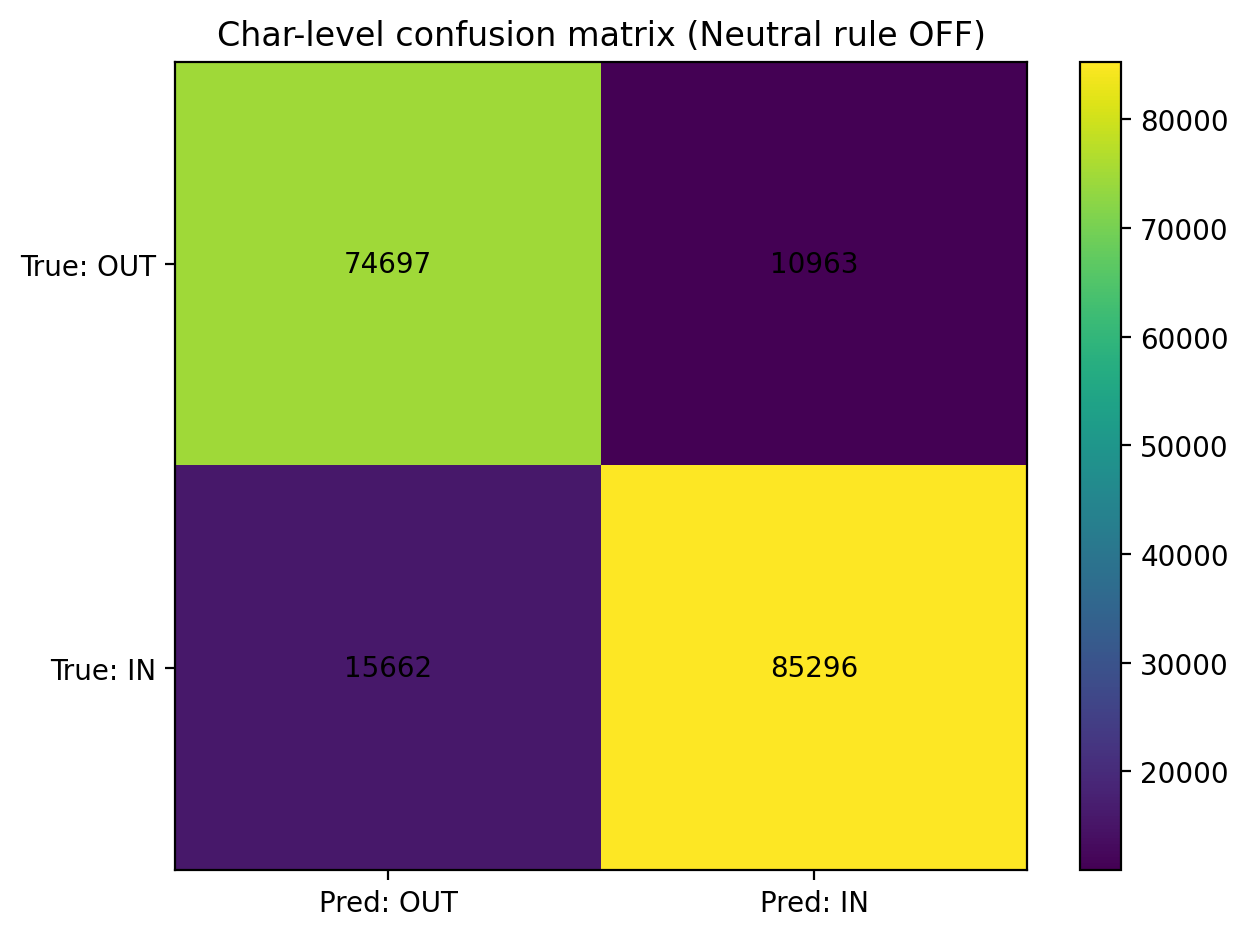


DEMO LOOP: type Q to quit
Tweet (type Q to quit): Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet
Sentiment (positive/negative/neutral) (type Q to quit): positive
Pred phrase: interesting.
Highlighted: Playing Ghost Online is really [[interesting.]] The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet


--------------------------------------------------------------------------------
Tweet (type Q to quit):  Sons of ****, why couldn`t they put them on the releases we already bought
Sentiment (positive/negative/neutral) (type Q to quit): negative
Pred phrase: Sons of ****,
Highlighted: [[Sons of ****,]] why couldn`t they put them on the releases we already bought


--------------------------------------------------------------------------------
Tweet (type Q to quit): is back home now      gonna miss every one
Sentiment (positive/negative/neutral) (type Q to quit): negative
Pred phrase: gonna miss
Highlighted: is back home now      [[gonna miss]] every one


--------------------------------------------------------------------------------
Tweet (type Q to quit): 2am feedings for the baby are fun when he is all smiles and coos
Sentiment (positive/negative/neutral) (type Q to quit): positive
Pred phrase: fun
Highlighted: 2am feedings for the baby are [[fun]] when he is all smiles and coos


--------------------------------------------------------------------------------
Tweet (type Q to quit): Q
Exit demo.

INFERENCE ON TEST -> submission.csv
Saved: /content/submission.csv
       textID                                      selected_text
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh
1  96d74cb729                                           exciting
2  eee518ae67                                             shame!
3  01082688c6                                        happy bday!
4  33987a8ee5                                        I like it!!
5  726e501993                                            great!!
6  261932614e                             I THINK EVERYONE HATES
7  afa11da83f                                            blocked
8  e64208b4ef  and within a short time of the last clue all o...
9  37bcad24ca  What did you get?  My day is alright.. haven`t...

Saved artifacts to Drive: /content/drive/MyDrive/ATI_Project4_artifacts

DONE. Figures saved in: /

In [ ]:
# =========================
# PROJECT 4: Tweet Sentiment Phrase Extraction (FULL + INLINE FIGURES + CM + LOOP DEMO)
# - Transformer span extraction (RoBERTa QA)
# - Outputs: EDA plots, training curves, confusion matrix (shown inline), demo inference loop (Q to quit)
# - Saves figures to /content/figs and optionally to Drive
# =========================

!pip -q install -U transformers accelerate datasets sentencepiece evaluate safetensors

import os, glob, re, math, random, warnings, inspect
from datetime import datetime
from typing import List, Tuple, Dict
from collections import defaultdict

import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset

import transformers
from transformers import (
    AutoTokenizer,
    AutoModelForQuestionAnswering,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback,
    set_seed,
)

import matplotlib.pyplot as plt
from IPython.display import display, HTML, Image

warnings.filterwarnings("ignore")

print("="*90)
print("PROJECT 4: FULL PIPELINE | Span Extraction (RoBERTa QA) + INLINE FIGS + CM + LOOP DEMO")
print("="*90)
print(f"Transformers: {transformers.__version__} | Torch: {torch.__version__}")
print("Time:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

# ---------------------------
# 0) Reproducibility & Device
# ---------------------------
SEED = 55
set_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------------------------
# 1) Mount Drive (optional) + Find CSV
# ---------------------------
try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=False)
    IN_COLAB = True
except:
    IN_COLAB = False

def find_csv(filename: str):
    for root in ["/content", "/content/drive/MyDrive", "/content/drive/Shareddrives"]:
        if os.path.exists(root):
            files = glob.glob(os.path.join(root, "**", filename), recursive=True)
            if files:
                return sorted(files, key=lambda x: len(x))[0]
    return None

TRAIN_CSV = find_csv("train.csv")
TEST_CSV  = find_csv("test.csv")
if not TRAIN_CSV or not TEST_CSV:
    raise FileNotFoundError("Không tìm thấy train.csv/test.csv. Hãy upload vào /content hoặc Drive.")

print("TRAIN_CSV:", TRAIN_CSV)
print("TEST_CSV :", TEST_CSV)

# ---------------------------
# 2) Load Data
# ---------------------------
train_df = pd.read_csv(TRAIN_CSV).dropna(subset=["text","selected_text","sentiment"]).reset_index(drop=True)
test_df  = pd.read_csv(TEST_CSV).dropna(subset=["text","sentiment"]).reset_index(drop=True)

train_df["text"] = train_df["text"].astype(str)
train_df["selected_text"] = train_df["selected_text"].astype(str)
train_df["sentiment"] = train_df["sentiment"].astype(str).str.lower()

test_df["text"] = test_df["text"].astype(str)
test_df["sentiment"] = test_df["sentiment"].astype(str).str.lower()

print(f"Train size: {len(train_df)} | Test size: {len(test_df)}")
print(train_df["sentiment"].value_counts())

# ---------------------------
# 3) Output folders for slide assets
# ---------------------------
FIG_DIR = "/content/figs"
os.makedirs(FIG_DIR, exist_ok=True)

def savefig(path):
    plt.tight_layout()
    plt.savefig(path, dpi=200, bbox_inches="tight")
    plt.close()
    print("Saved figure:", path)

def show_image(path, title=None, width=800):
    if title:
        print("\n" + title)
    if os.path.exists(path):
        display(Image(filename=path, width=width))
    else:
        print("Missing image:", path)

# ---------------------------
# 4) EDA + VISUALIZATION (for slides)
# ---------------------------
print("\n" + "="*90)
print("EDA + VISUALIZATION")
print("="*90)

train_df["text_len"] = train_df["text"].str.len().clip(lower=1)
train_df["sel_len"]  = train_df["selected_text"].str.len().clip(lower=0)
train_df["sel_ratio"] = train_df["sel_len"] / train_df["text_len"]

# Sentiment distribution
counts = train_df["sentiment"].value_counts().reindex(["negative","neutral","positive"])
plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Sentiment distribution (train)")
plt.xlabel("sentiment")
plt.ylabel("count")
savefig(os.path.join(FIG_DIR, "eda_sentiment_distribution.png"))

# Text length histogram
plt.figure()
plt.hist(train_df["text_len"].values, bins=60)
plt.title("Tweet text length distribution (chars)")
plt.xlabel("text_len")
plt.ylabel("frequency")
savefig(os.path.join(FIG_DIR, "eda_text_len_hist.png"))

# Selected length histogram
plt.figure()
plt.hist(train_df["sel_len"].values, bins=60)
plt.title("Selected_text length distribution (chars)")
plt.xlabel("sel_len")
plt.ylabel("frequency")
savefig(os.path.join(FIG_DIR, "eda_selected_len_hist.png"))

# sel_ratio boxplot by sentiment
sent_order = ["negative","neutral","positive"]
data = [train_df.loc[train_df["sentiment"]==s, "sel_ratio"].values for s in sent_order]
plt.figure()
plt.boxplot(data, labels=sent_order, showfliers=False)
plt.title("Selected span ratio (sel_len / text_len) by sentiment")
plt.xlabel("sentiment")
plt.ylabel("sel_ratio")
savefig(os.path.join(FIG_DIR, "eda_sel_ratio_boxplot.png"))

print("\nSpan stats by sentiment:")
for s in sent_order:
    sub = train_df[train_df["sentiment"]==s]
    print(f"{s:8s} | n={len(sub):5d} | text_len(mean)={sub['text_len'].mean():.1f} | sel_len(mean)={sub['sel_len'].mean():.1f} | sel_ratio(mean)={sub['sel_ratio'].mean():.3f}")

# Show key EDA figures inline
show_image(os.path.join(FIG_DIR, "eda_sentiment_distribution.png"), "INLINE FIGURE: EDA Sentiment Distribution", width=700)
show_image(os.path.join(FIG_DIR, "eda_sel_ratio_boxplot.png"),      "INLINE FIGURE: EDA Selected Ratio by Sentiment", width=700)

# ---------------------------
# 5) Split Train/Val
# ---------------------------
from sklearn.model_selection import train_test_split
VAL_RATIO = 0.1

tr_df, va_df = train_test_split(
    train_df,
    test_size=VAL_RATIO,
    random_state=SEED,
    stratify=train_df["sentiment"]
)
tr_df = tr_df.reset_index(drop=True)
va_df = va_df.reset_index(drop=True)
print(f"\nTrain split: {len(tr_df)} | Val split: {len(va_df)}")

# ---------------------------
# 6) Config
# ---------------------------
MODEL_NAME = "cardiffnlp/twitter-roberta-base"
MAX_LEN = 192

LR = 2e-5
WEIGHT_DECAY = 0.01
WARMUP_RATIO = 0.06
EPOCHS = 4
TRAIN_BS = 16
EVAL_BS = 32
GRAD_ACCUM = 2
MAX_GRAD_NORM = 1.0

# Decode tuned
TOPK = 50
TEMP = 0.9
LEN_PENALTY = 0.01
SINGLE_TOKEN_PENALTY = 0.25
MID_SPAN_BONUS = 0.08
MID_SPAN_MIN = 2
MID_SPAN_MAX = 10
MAX_SPAN_TOKENS = {"positive": 60, "negative": 60, "neutral": 140}

USE_NEUTRAL_RULE_FOR_SUBMISSION = True

# LLRD
USE_LLRD = True
LLRD_DECAY = 0.9

print("\nCONFIG")
print(f"Model: {MODEL_NAME} | MAX_LEN={MAX_LEN}")
print(f"Train: LR={LR}, epochs={EPOCHS}, bs={TRAIN_BS}, grad_acc={GRAD_ACCUM}, wd={WEIGHT_DECAY}, warmup={WARMUP_RATIO}")
print(f"Decode: topk={TOPK}, temp={TEMP}, len_pen={LEN_PENALTY}, single_pen={SINGLE_TOKEN_PENALTY}, mid_bonus={MID_SPAN_BONUS} ({MID_SPAN_MIN}-{MID_SPAN_MAX})")
print(f"Neutral rule (submission): {USE_NEUTRAL_RULE_FOR_SUBMISSION} | LLRD: {USE_LLRD} (decay={LLRD_DECAY})")

# ---------------------------
# 7) Tokenizer + Prompt
# ---------------------------
try:
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True, add_prefix_space=True)
except TypeError:
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

def build_query(sent: str) -> str:
    return f"Extract the {sent} phrase"

# ---------------------------
# 8) Label alignment (multi-occurrence handling)
# ---------------------------
WORD_CHARS = set("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_'")

def snap_to_word_boundaries(text: str, s: int, e: int) -> Tuple[int,int]:
    n = len(text)
    s = max(0, min(n, s)); e = max(0, min(n, e))
    if e < s: e = s
    while s > 0 and (text[s-1] in WORD_CHARS) and (s < n and text[s] in WORD_CHARS):
        s -= 1
    while e < n and (e-1 >= 0 and text[e-1] in WORD_CHARS) and (text[e] in WORD_CHARS):
        e += 1
    raw = text[s:e]
    stripped = raw.strip()
    if stripped:
        win_s = max(0, s-6); win_e = min(n, e+6)
        win = text[win_s:win_e]
        pos = win.find(stripped)
        if pos != -1:
            s = win_s + pos
            e = s + len(stripped)
    return s, e

def all_occurrences(text: str, sub: str) -> List[Tuple[int,int]]:
    res = []
    if not sub:
        return res
    start = 0
    while True:
        idx = text.find(sub, start)
        if idx == -1:
            break
        res.append((idx, idx + len(sub)))
        start = idx + 1
    return res

def find_char_span_candidates(text: str, sel: str) -> List[Tuple[int,int]]:
    cands = []
    if sel and sel in text:
        cands += all_occurrences(text, sel)

    sel2 = sel.strip()
    if sel2 and sel2 != sel and sel2 in text:
        cands += all_occurrences(text, sel2)

    if not cands and sel2:
        try:
            patt = re.escape(sel2).replace(r"\ ", r"\s+")
            for m in re.finditer(patt, text, flags=re.IGNORECASE):
                cands.append((m.start(), m.end()))
        except:
            pass

    return list(dict.fromkeys(cands))

def map_char_to_token_span(enc, char_span: Tuple[int,int]) -> Tuple[int,int]:
    cs, ce = char_span
    offsets = enc["offset_mapping"]
    seq_ids = enc.sequence_ids()

    ctx = [i for i, sid in enumerate(seq_ids) if sid == 1]
    if not ctx:
        return 0, 0
    c0, c1 = ctx[0], ctx[-1]

    if offsets[c0][0] > ce or offsets[c1][1] < cs:
        return 0, 0

    ts = c0
    while ts <= c1 and offsets[ts][1] <= cs:
        ts += 1
    te = c1
    while te >= c0 and offsets[te][0] >= ce:
        te -= 1

    if ts > c1 or te < c0 or te < ts:
        return 0, 0
    return int(ts), int(te)

def encode_df(df: pd.DataFrame):
    feats = []
    for _, r in df.iterrows():
        text = r["text"]
        sent = r["sentiment"]
        sel  = r.get("selected_text", "")

        query = build_query(sent)

        enc = tokenizer(
            query, text,
            truncation="only_second",
            max_length=MAX_LEN,
            padding=False,
            return_offsets_mapping=True,
        )

        cands = find_char_span_candidates(text, sel)
        best_tok = (0, 0)
        best_len = 10**9

        if cands:
            for cs, ce in cands:
                ts, te = map_char_to_token_span(enc, (cs, ce))
                if ts == 0 and te == 0:
                    continue
                span_len = te - ts + 1
                if span_len < best_len:
                    best_len = span_len
                    best_tok = (ts, te)

        enc.pop("offset_mapping", None)
        enc["start_positions"] = int(best_tok[0])
        enc["end_positions"]   = int(best_tok[1])
        feats.append(enc)

    return feats

class QADataset(Dataset):
    def __init__(self, feats): self.feats = feats
    def __len__(self): return len(self.feats)
    def __getitem__(self, i): return self.feats[i]

print("\nEncoding train/val...")
train_ds = QADataset(encode_df(tr_df))
val_ds   = QADataset(encode_df(va_df))

# ---------------------------
# 9) Collator
# ---------------------------
class QACollator:
    def __init__(self, tokenizer, pad_to_multiple_of=None):
        self.tokenizer = tokenizer
        self.pad_to_multiple_of = pad_to_multiple_of
    def __call__(self, features):
        start_pos = torch.tensor([int(f["start_positions"]) for f in features], dtype=torch.long)
        end_pos   = torch.tensor([int(f["end_positions"]) for f in features], dtype=torch.long)
        feats = [{k: v for k, v in f.items() if k not in ("start_positions","end_positions")} for f in features]
        batch = self.tokenizer.pad(
            feats,
            padding=True,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        batch["start_positions"] = start_pos
        batch["end_positions"]   = end_pos
        return batch

data_collator = QACollator(tokenizer, pad_to_multiple_of=8 if torch.cuda.is_available() else None)

# ---------------------------
# 10) Custom Trainer (label_names + LLRD)
# ---------------------------
class QATrainer(Trainer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.label_names = ["start_positions", "end_positions"]

    def create_optimizer(self):
        if self.optimizer is not None:
            return self.optimizer

        if not USE_LLRD:
            self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
            return self.optimizer

        no_decay = ["bias", "LayerNorm.weight", "layer_norm.weight"]
        n_layers = self.model.config.num_hidden_layers

        def layer_lr(name: str) -> float:
            if "qa_outputs" in name:
                return LR
            if "roberta.embeddings" in name:
                return LR * (LLRD_DECAY ** (n_layers + 1))
            m = re.search(r"roberta\.encoder\.layer\.(\d+)\.", name)
            if m:
                layer_id = int(m.group(1))
                depth = (n_layers - 1) - layer_id
                return LR * (LLRD_DECAY ** (depth + 1))
            return LR * (LLRD_DECAY ** (n_layers + 1))

        param_groups: Dict[Tuple[float, float], List[torch.nn.Parameter]] = {}
        for n, p in self.model.named_parameters():
            if not p.requires_grad:
                continue
            wd = 0.0 if any(nd in n for nd in no_decay) else WEIGHT_DECAY
            lr = layer_lr(n)
            key = (lr, wd)
            param_groups.setdefault(key, []).append(p)

        groups = [{"params": ps, "lr": lr, "weight_decay": wd} for (lr, wd), ps in param_groups.items()]
        self.optimizer = torch.optim.AdamW(groups, betas=(0.9, 0.999), eps=1e-8)
        return self.optimizer

# ---------------------------
# 11) TrainingArguments (robust keys across transformers versions)
# ---------------------------
TA_SIG = inspect.signature(TrainingArguments.__init__).parameters
EVAL_KEY = "evaluation_strategy" if "evaluation_strategy" in TA_SIG else ("eval_strategy" if "eval_strategy" in TA_SIG else None)
SAVE_KEY = "save_strategy" if "save_strategy" in TA_SIG else None

out_dir = f"/content/ati_p4_seed{SEED}_final"
args_kw = dict(
    output_dir=out_dir,
    learning_rate=LR,
    weight_decay=WEIGHT_DECAY,
    warmup_ratio=WARMUP_RATIO,
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=TRAIN_BS,
    per_device_eval_batch_size=EVAL_BS,
    gradient_accumulation_steps=GRAD_ACCUM,
    logging_steps=100,
    save_total_limit=1,
    report_to="none",
    fp16=bool(torch.cuda.is_available()),
    remove_unused_columns=False,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    max_grad_norm=MAX_GRAD_NORM,
)
if EVAL_KEY: args_kw[EVAL_KEY] = "epoch"
if SAVE_KEY: args_kw[SAVE_KEY] = "epoch"
training_args = TrainingArguments(**args_kw)

# ---------------------------
# 12) Model + Train
# ---------------------------
model = AutoModelForQuestionAnswering.from_pretrained(MODEL_NAME).to(device)

trainer = QATrainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)],
)

print("\n" + "="*90)
print("TRAINING...")
print("="*90)
trainer.train()
trainer.save_model(out_dir)
print("Saved model to:", out_dir)

# ---------------------------
# 13) Training curves plot (and show inline)
# ---------------------------
log_hist = trainer.state.log_history
train_steps, train_losses = [], []
eval_epochs, eval_losses = [], []

for h in log_hist:
    if "loss" in h and "eval_loss" not in h:
        train_steps.append(h.get("step", len(train_steps)))
        train_losses.append(h["loss"])
    if "eval_loss" in h:
        eval_epochs.append(h.get("epoch", len(eval_epochs)+1))
        eval_losses.append(h["eval_loss"])

if len(train_losses) > 0:
    plt.figure()
    plt.plot(train_steps, train_losses)
    plt.title("Training loss vs step")
    plt.xlabel("step")
    plt.ylabel("train_loss")
    savefig(os.path.join(FIG_DIR, "train_curve_loss.png"))
    show_image(os.path.join(FIG_DIR, "train_curve_loss.png"), "INLINE FIGURE: Training Loss Curve", width=700)

if len(eval_losses) > 0:
    plt.figure()
    plt.plot(eval_epochs, eval_losses, marker="o")
    plt.title("Validation loss vs epoch")
    plt.xlabel("epoch")
    plt.ylabel("eval_loss")
    savefig(os.path.join(FIG_DIR, "val_curve_eval_loss.png"))
    show_image(os.path.join(FIG_DIR, "val_curve_eval_loss.png"), "INLINE FIGURE: Validation Loss Curve", width=700)

# ---------------------------
# 14) Decode helpers + batched prediction
# ---------------------------
def smart_decode(start_logits, end_logits, offsets, seq_ids, text, sentiment):
    ctx = [i for i, sid in enumerate(seq_ids) if sid == 1]
    if not ctx:
        return text.strip(), (0, len(text))
    c0, c1 = ctx[0], ctx[-1]

    sL = start_logits / TEMP
    eL = end_logits / TEMP

    s_rank = np.argsort(sL)[::-1]
    e_rank = np.argsort(eL)[::-1]
    s_cands = [i for i in s_rank if c0 <= i <= c1][:TOPK]
    e_cands = [i for i in e_rank if c0 <= i <= c1][:TOPK]

    best_score = -1e18
    best_pair = (c0, c0)
    max_len = MAX_SPAN_TOKENS.get(sentiment, 60)

    for si in s_cands:
        if offsets[si] == (0, 0):
            continue
        for ei in e_cands:
            if ei < si or offsets[ei] == (0, 0):
                continue
            span_len = ei - si + 1
            if span_len > max_len:
                continue

            score = float(sL[si] + eL[ei]) - LEN_PENALTY * span_len

            if sentiment in ["positive", "negative"] and span_len == 1:
                score -= SINGLE_TOKEN_PENALTY
            if sentiment in ["positive", "negative"] and MID_SPAN_MIN <= span_len <= MID_SPAN_MAX:
                score += MID_SPAN_BONUS

            if score > best_score:
                best_score = score
                best_pair = (si, ei)

    si, ei = best_pair
    cs, ce = offsets[si][0], offsets[ei][1]
    cs, ce = snap_to_word_boundaries(text, cs, ce)
    pred = text[cs:ce].strip()
    if pred == "":
        return text.strip(), (0, len(text))
    return pred, (cs, ce)

@torch.no_grad()
def predict_df(df: pd.DataFrame, batch_size=64, neutral_rule=False):
    texts = df["text"].tolist()
    sents = df["sentiment"].tolist()
    queries = [build_query(s) for s in sents]

    enc = tokenizer(
        queries, texts,
        truncation="only_second",
        max_length=MAX_LEN,
        padding="max_length",
        return_offsets_mapping=True,
    )

    input_ids = torch.tensor(enc["input_ids"], dtype=torch.long)
    attn      = torch.tensor(enc["attention_mask"], dtype=torch.long)
    offsets_all = enc["offset_mapping"]

    preds_phrase, preds_span = [], []

    for st in range(0, len(texts), batch_size):
        ed = min(len(texts), st + batch_size)

        ids = input_ids[st:ed].to(device)
        am  = attn[st:ed].to(device)

        out = trainer.model(input_ids=ids, attention_mask=am)
        s_logits = out.start_logits.detach().cpu().numpy()
        e_logits = out.end_logits.detach().cpu().numpy()

        for i in range(ed - st):
            idx = st + i
            text = texts[idx]
            sent = sents[idx]

            if neutral_rule and sent == "neutral":
                pred = text.strip()
                span = (0, len(text))
            else:
                seq_ids = enc.sequence_ids(idx)
                offsets = offsets_all[idx]
                pred, span = smart_decode(s_logits[i], e_logits[i], offsets, seq_ids, text, sent)

            preds_phrase.append(pred if pred.strip() else text.strip())
            preds_span.append(span)

    return preds_phrase, preds_span

# ---------------------------
# 15) Evaluation + Confusion matrix (char-level) + show inline
# ---------------------------
def word_jaccard(a: str, b: str) -> float:
    sa, sb = set(a.lower().split()), set(b.lower().split())
    if not sa and not sb:
        return 1.0
    return len(sa & sb) / len(sa | sb) if (sa | sb) else 0.0

def char_overlap_metrics(text: str, true_span: Tuple[int,int], pred_span: Tuple[int,int]):
    n = len(text)
    ts, te = max(0, min(n, true_span[0])), max(0, min(n, true_span[1]))
    ps, pe = max(0, min(n, pred_span[0])), max(0, min(n, pred_span[1]))
    if te < ts: te = ts
    if pe < ps: pe = ps

    inter = max(0, min(te, pe) - max(ts, ps))
    true_len = te - ts
    pred_len = pe - ps
    union = true_len + pred_len - inter

    iou = inter / union if union > 0 else 1.0
    prec = inter / pred_len if pred_len > 0 else (1.0 if true_len == 0 else 0.0)
    rec  = inter / true_len if true_len > 0 else (1.0 if pred_len == 0 else 0.0)
    f1   = (2*prec*rec/(prec+rec)) if (prec+rec) > 0 else 0.0

    TP = inter
    FP = pred_len - inter
    FN = true_len - inter
    TN = n - union
    return prec, rec, f1, iou, TP, FP, FN, TN

def eval_on_val(neutral_rule_eval: bool):
    val_pred_phrase, val_pred_span = predict_df(va_df, batch_size=64, neutral_rule=neutral_rule_eval)

    metrics = defaultdict(list)
    per_sent = defaultdict(lambda: defaultdict(list))
    CM = {"TP":0, "FP":0, "FN":0, "TN":0}

    for i, row in va_df.iterrows():
        text = row["text"]
        sent = row["sentiment"]
        true_sel = row["selected_text"]

        cands = find_char_span_candidates(text, true_sel)
        if not cands:
            true_span = (0, 0)
            true_phrase = ""
        else:
            ts, te = cands[0]
            ts, te = snap_to_word_boundaries(text, ts, te)
            true_span = (ts, te)
            true_phrase = text[ts:te].strip()

        pred_phrase = val_pred_phrase[i]
        pred_span   = val_pred_span[i]

        p, r, f1, iou, TP, FP, FN, TN = char_overlap_metrics(text, true_span, pred_span)
        wj = word_jaccard(true_phrase, pred_phrase)

        metrics["char_precision"].append(p)
        metrics["char_recall"].append(r)
        metrics["char_f1"].append(f1)
        metrics["char_iou"].append(iou)
        metrics["word_jaccard"].append(wj)

        per_sent[sent]["char_f1"].append(f1)
        per_sent[sent]["word_jaccard"].append(wj)

        CM["TP"] += TP; CM["FP"] += FP; CM["FN"] += FN; CM["TN"] += TN

    return metrics, per_sent, CM

def print_eval(title, metrics, per_sent, CM):
    print("\n" + "-"*90)
    print(title)
    print("-"*90)
    print("VAL RESULTS (MACRO)")
    print(f"Word Jaccard:   {np.mean(metrics['word_jaccard']):.4f}")
    print(f"Char Precision: {np.mean(metrics['char_precision']):.4f}")
    print(f"Char Recall:    {np.mean(metrics['char_recall']):.4f}")
    print(f"Char F1:        {np.mean(metrics['char_f1']):.4f}")
    print(f"Char IoU:       {np.mean(metrics['char_iou']):.4f}")

    TP, FP, FN, TN = CM["TP"], CM["FP"], CM["FN"], CM["TN"]
    micro_prec = TP / (TP + FP) if (TP+FP)>0 else 0.0
    micro_rec  = TP / (TP + FN) if (TP+FN)>0 else 0.0
    micro_f1   = (2*micro_prec*micro_rec/(micro_prec+micro_rec)) if (micro_prec+micro_rec)>0 else 0.0
    micro_iou  = TP / (TP + FP + FN) if (TP+FP+FN)>0 else 0.0
    char_acc   = (TP + TN) / (TP + FP + FN + TN) if (TP+FP+FN+TN)>0 else 0.0
    print("\nVAL RESULTS (MICRO over chars)")
    print(f"Micro-Prec: {micro_prec:.4f} | Micro-Rec: {micro_rec:.4f} | Micro-F1: {micro_f1:.4f} | Micro-IoU: {micro_iou:.4f} | Char-Acc: {char_acc:.4f}")

    print("\nPER-SENTIMENT (MACRO)")
    for s in ["positive","negative","neutral"]:
        if s in per_sent and len(per_sent[s]["word_jaccard"])>0:
            print(f"{s:8s} | Jaccard={np.mean(per_sent[s]['word_jaccard']):.4f} | CharF1={np.mean(per_sent[s]['char_f1']):.4f} | n={len(per_sent[s]['word_jaccard'])}")

def plot_confusion_matrix(CM, title, out_path):
    TN, FP, FN, TP = CM["TN"], CM["FP"], CM["FN"], CM["TP"]
    mat = np.array([[TN, FP],
                    [FN, TP]], dtype=np.float64)

    plt.figure()
    plt.imshow(mat, aspect="auto")
    plt.title(title)
    plt.xticks([0,1], ["Pred: OUT", "Pred: IN"])
    plt.yticks([0,1], ["True: OUT", "True: IN"])
    for (i,j), v in np.ndenumerate(mat):
        plt.text(j, i, f"{int(v)}", ha="center", va="center")
    plt.colorbar()
    savefig(out_path)

print("\n" + "="*90)
print("EVALUATION ON VAL (report BOTH: neutral_rule OFF and ON)")
print("="*90)

metrics_off, per_sent_off, CM_off = eval_on_val(neutral_rule_eval=False)
metrics_on,  per_sent_on,  CM_on  = eval_on_val(neutral_rule_eval=True)

print_eval("EVAL (Neutral rule OFF) - more 'honest' for model capability", metrics_off, per_sent_off, CM_off)
print_eval("EVAL (Neutral rule ON)  - matches your submission policy",        metrics_on,  per_sent_on,  CM_on)

cm_on_path  = os.path.join(FIG_DIR, "confusion_matrix_char_on.png")
cm_off_path = os.path.join(FIG_DIR, "confusion_matrix_char_off.png")
plot_confusion_matrix(CM_on,  "Char-level confusion matrix (Neutral rule ON)",  cm_on_path)
plot_confusion_matrix(CM_off, "Char-level confusion matrix (Neutral rule OFF)", cm_off_path)

# Show confusion matrix figures inline (so teacher sees inside ipynb output)
show_image(cm_on_path,  "INLINE FIGURE: Confusion Matrix (Char-level) - Neutral rule ON",  width=700)
show_image(cm_off_path, "INLINE FIGURE: Confusion Matrix (Char-level) - Neutral rule OFF", width=700)

# ---------------------------
# 16) Demo inference loop (Q to quit) — still requires sentiment (matches the project)
# ---------------------------
def highlight_span(text: str, span: Tuple[int,int]) -> str:
    s, e = span
    s = max(0, min(len(text), s))
    e = max(0, min(len(text), e))
    if e < s: e = s
    return text[:s] + "[[" + text[s:e] + "]]" + text[e:]

@torch.no_grad()
def predict_one(text: str, sentiment: str, neutral_rule=True):
    sentiment = sentiment.lower().strip()
    query = build_query(sentiment)
    enc = tokenizer(query, text, truncation="only_second", max_length=MAX_LEN, padding="max_length", return_offsets_mapping=True)
    offsets = enc["offset_mapping"]
    seq_ids = enc.sequence_ids()

    ids = torch.tensor([enc["input_ids"]], dtype=torch.long).to(device)
    am  = torch.tensor([enc["attention_mask"]], dtype=torch.long).to(device)

    out = trainer.model(input_ids=ids, attention_mask=am)
    s_logits = out.start_logits[0].detach().cpu().numpy()
    e_logits = out.end_logits[0].detach().cpu().numpy()

    if neutral_rule and sentiment == "neutral":
        pred = text.strip()
        span = (0, len(text))
    else:
        pred, span = smart_decode(s_logits, e_logits, offsets, seq_ids, text, sentiment)

    return pred, span

print("\n" + "="*90)
print("DEMO LOOP: type Q to quit")
print("="*90)

while True:
    tweet = input("Tweet (type Q to quit): ").strip()
    if tweet.lower() == "q":
        print("Exit demo.")
        break
    if not tweet:
        print("Empty tweet. Type Q to quit, or enter a tweet.")
        continue

    sent = input("Sentiment (positive/negative/neutral) (type Q to quit): ").strip().lower()
    if sent == "q":
        print("Exit demo.")
        break
    if sent not in ["positive","negative","neutral"]:
        print("Invalid sentiment. Please enter: positive / negative / neutral.")
        continue

    pred, span = predict_one(tweet, sent, neutral_rule=USE_NEUTRAL_RULE_FOR_SUBMISSION)
    print("Pred phrase:", pred)
    # show both plain and highlighted (HTML mark)
    print("Highlighted:", highlight_span(tweet, span))
    display(HTML(
        f"<div style='font-size:16px;line-height:1.6'>"
        f"<b>Highlighted:</b><br>"
        f"{highlight_span(tweet, span).replace('[[','<mark>').replace(']]','</mark>')}"
        f"</div>"
    ))
    print("-"*80)

# ---------------------------
# 17) Predict test + save submission
# ---------------------------
print("\n" + "="*90)
print("INFERENCE ON TEST -> submission.csv")
print("="*90)

test_pred_phrase, _ = predict_df(test_df, batch_size=96, neutral_rule=USE_NEUTRAL_RULE_FOR_SUBMISSION)

submission = pd.DataFrame({
    "textID": test_df["textID"].values if "textID" in test_df.columns else np.arange(len(test_df)),
    "selected_text": test_pred_phrase
})
sub_path = "/content/submission.csv"
submission.to_csv(sub_path, index=False)
print("Saved:", sub_path)
print(submission.head(10))

# ---------------------------
# 18) Save artifacts to Drive (optional)
# ---------------------------
try:
    drive_out = "/content/drive/MyDrive/ATI_Project4_artifacts"
    os.makedirs(drive_out, exist_ok=True)

    for fp in glob.glob(os.path.join(FIG_DIR, "*.png")):
        bn = os.path.basename(fp)
        os.system(f"cp '{fp}' '{os.path.join(drive_out, bn)}'")

    os.system(f"cp '{sub_path}' '{os.path.join(drive_out, 'submission.csv')}'")

    summary_path = "/content/run_summary.txt"
    with open(summary_path, "w", encoding="utf-8") as f:
        f.write("PROJECT 4 artifacts\n")
        f.write(f"Time: {datetime.now()}\n")
        f.write(f"Model: {MODEL_NAME}\n")
        f.write(f"Seed: {SEED}\n")
        f.write(f"Neutral rule (submission): {USE_NEUTRAL_RULE_FOR_SUBMISSION}\n")
        f.write(f"Figures dir: {FIG_DIR}\n")
        f.write("\nValidation (Neutral OFF):\n")
        f.write(f"  Jaccard={np.mean(metrics_off['word_jaccard']):.4f}, CharF1={np.mean(metrics_off['char_f1']):.4f}\n")
        f.write("Validation (Neutral ON):\n")
        f.write(f"  Jaccard={np.mean(metrics_on['word_jaccard']):.4f}, CharF1={np.mean(metrics_on['char_f1']):.4f}\n")

    os.system(f"cp '{summary_path}' '{os.path.join(drive_out, 'run_summary.txt')}'")

    print("\nSaved artifacts to Drive:", drive_out)
except Exception as e:
    print("Drive export skipped:", e)

print("\nDONE. Figures saved in:", FIG_DIR)
print("Submission:", sub_path)
